<a href="https://colab.research.google.com/github/shitote/dist-repo/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Computer vision is the practice of writing algorithms that can discover patterns in visual data. Like the camera of a self-driving car recording the car and other objects in front

## Get the data

The images are from kaggle Food101 dataset with 101 different classes

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close

--2023-12-29 05:12:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 2607:f8b0:4023:c0b::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   148MB/s    in 0.7s    

2023-12-29 05:12:21 (148 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



<bound method ZipFile.close of <zipfile.ZipFile filename='pizza_steak.zip' mode='r'>>

## Inspact the data (Become onewith the data)

for a computer vision project it means visualizing many samples of the data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:
!ls pizza_steak/train/steak;

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
import os

# Walk through pizza_stea directory and list number of files.
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/steak
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/steak
There are 0 directories and 250 images in pizza_steak/test/pizza


In [ ]:
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 Dec 28 05:35 .
drwxr-xr-x 1 root root 4096 Dec 28 05:35 ..
drwxr-xr-x 4 root root 4096 Dec 28 05:35 test
drwxr-xr-x 4 root root 4096 Dec 28 05:35 train


In [ ]:
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
num_steak_images_train

750

To visual the imagses, first get the images programaticaly

In [ ]:
# Ge the classnames Programatically
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Created a list of class_names from the subclasses
print(class_names)

['pizza' 'steak']


In [12]:
# Let's Visualize the images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the target dirctory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}') # Show the shape of the image.

  return img

['3298495.jpg']
Image shape: (333, 512, 3)


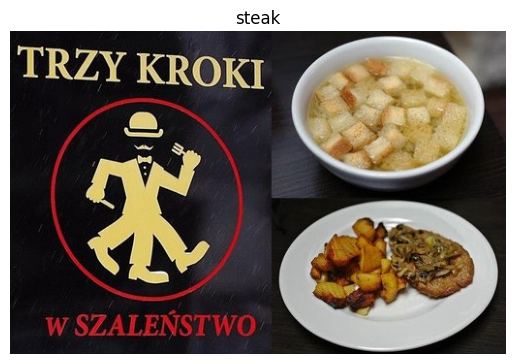

In [ ]:
# View a random image from the training dataset
img = view_random_image(target_dir='pizza_steak/train/', target_class='steak')

['3790235.jpg']
Image shape: (512, 384, 3)


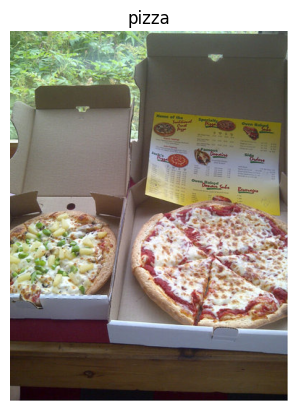

In [ ]:
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class='pizza')

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 86,  41,  72],
        [ 87,  42,  73],
        [ 88,  43,  72],
        ...,
        [ 90,  99, 158],
        [ 88,  96, 159],
        [ 87,  97, 159]],

       [[ 84,  39,  70],
        [ 85,  40,  69],
        [ 86,  41,  70],
        ...,
        [ 93, 101, 163],
        [ 93, 103, 165],
        [ 95, 105, 167]],

       [[ 86,  40,  69],
        [ 86,  40,  68],
        [ 86,  40,  68],
        ...,
        [ 96, 104, 166],
        [ 97, 107, 169],
        [100, 111, 173]],

       ...,

       [[203, 101,  27],
        [204, 102,  28],
        [205, 103,  29],
        ...,
        [190,  92,  27],
        [190,  92,  27],
        [188,  93,  27]],

       [[204, 102,  27],
        [204, 102,  27],
        [204, 102,  27],
        ...,
        [189,  91,  26],
        [186,  91,  27],
        [185,  91,  27]],

       [[205, 103,  28],
        [204, 102,  27],
        [203, 101,  26],
        ...,
        [185,  90,  2

In [ ]:
# View the image shape
# Reurns width, height, color channels
img.shape


(384, 512, 3)

🔑**NOTE** many machine learning algotithms including neural networks prefer the the values to work
with to be tween 0 and 1. Kwoneing this one of the most common preprocessing steps is to scale the images into
0 and 1 (it si also called  **normalizatio**n)

In [ ]:
# Get all the pixel values between  0 and 1
img/225.

array([[[0.38222222, 0.18222222, 0.32      ],
        [0.38666667, 0.18666667, 0.32444444],
        [0.39111111, 0.19111111, 0.32      ],
        ...,
        [0.4       , 0.44      , 0.70222222],
        [0.39111111, 0.42666667, 0.70666667],
        [0.38666667, 0.43111111, 0.70666667]],

       [[0.37333333, 0.17333333, 0.31111111],
        [0.37777778, 0.17777778, 0.30666667],
        [0.38222222, 0.18222222, 0.31111111],
        ...,
        [0.41333333, 0.44888889, 0.72444444],
        [0.41333333, 0.45777778, 0.73333333],
        [0.42222222, 0.46666667, 0.74222222]],

       [[0.38222222, 0.17777778, 0.30666667],
        [0.38222222, 0.17777778, 0.30222222],
        [0.38222222, 0.17777778, 0.30222222],
        ...,
        [0.42666667, 0.46222222, 0.73777778],
        [0.43111111, 0.47555556, 0.75111111],
        [0.44444444, 0.49333333, 0.76888889]],

       ...,

       [[0.90222222, 0.44888889, 0.12      ],
        [0.90666667, 0.45333333, 0.12444444],
        [0.91111111, 0

## An end-to-end

* Load images
* Preprocess the images
* Build CNN to find patterns in the images.
* Compile CNN
* And then Fit it

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the normal random seed
tf.random.set_seed(42)

# Preprocess data (Get all the pix values between zeros and ones)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# path to the data dir
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42
                                               )
valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42
                                               )

# Build a CNN model (same as the tiny VGG)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the CNN model
model_1.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data)
                        )

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 8s 141ms/step - loss: 0.5978 - accuracy: 0.6633 - val_loss: 0.4449 - val_accuracy: 0.8100
Epoch 2/5
47/47 [==============================] - 9s 190ms/step - loss: 0.4416 - accuracy: 0.7993 - val_loss: 0.3458 - val_accuracy: 0.8600
Epoch 3/5
47/47 [==============================] - 7s 144ms/step - loss: 0.4014 - accuracy: 0.8247 - val_loss: 0.3679 - val_accuracy: 0.8120
Epoch 4/5
47/47 [==============================] - 7s 150ms/step - loss: 0.3850 - accuracy: 0.8273 - val_loss: 0.4651 - val_accuracy: 0.7820
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.3622 - accuracy: 0.8473 - val_loss: 0.3386 - val_accuracy: 0.8440


In [ ]:
model_1.evaluate(test_data)

16/16 [==============================] - 3s 89ms/step - loss: 1.3508 - accuracy: 0.5000


[1.3507511615753174, 0.5]

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

### More on modeling

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation= 'sigmoid')
])

# Complit the model
model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']
                )

# fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data = valid_data,
                        validation_steps= len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 114ms/step - loss: 0.7917 - accuracy: 0.5033 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 135ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 107ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 129ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 112ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
tf.random.set_seed(24)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy']
                )

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data)
                        )

Epoch 1/5
47/47 [==============================] - 7s 113ms/step - loss: 3.2510 - accuracy: 0.6060 - val_loss: 0.5490 - val_accuracy: 0.7680
Epoch 2/5
47/47 [==============================] - 6s 131ms/step - loss: 0.8571 - accuracy: 0.7227 - val_loss: 0.6584 - val_accuracy: 0.7120
Epoch 3/5
47/47 [==============================] - 5s 117ms/step - loss: 0.7208 - accuracy: 0.7127 - val_loss: 0.4665 - val_accuracy: 0.7660
Epoch 4/5
47/47 [==============================] - 6s 131ms/step - loss: 0.5170 - accuracy: 0.7613 - val_loss: 0.9118 - val_accuracy: 0.6480
Epoch 5/5
47/47 [==============================] - 5s 110ms/step - loss: 0.5686 - accuracy: 0.7587 - val_loss: 0.4807 - val_accuracy: 0.7660


In [ ]:
# Get a summary of model 3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Binary Classification: break it down
1. Become on with the data( Visualize)
2. Preprocess the data(Scaling/ normalization)
3. Create a model.
4. Compile the model.
5. Fit the model.
6. Evalueate the model.
7. Adjust different paramenters and improve the model.
8. Repeat Until satisfied

### Become one with the data

['22080.jpg']
Image shape: (342, 512, 3)
['52934.jpg']
Image shape: (512, 384, 3)


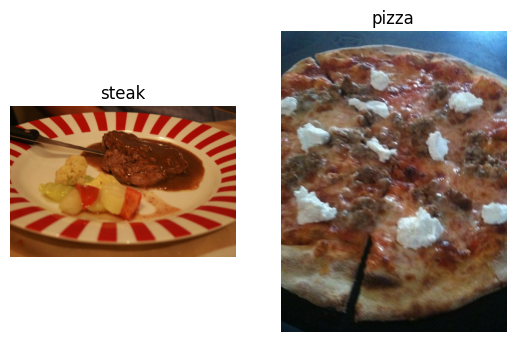

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_image = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')

###  2. Preprocess the data

In [ ]:
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test'

Trun the data into **batches**

A batch is a samall subset of data. Rather than looking at all 1000 images at one time the model take only 323 at a time.

This is because:
1. 10000 + images might not fit in the memory of the processor(GPU)
2. Learning petterns in alot of images can some time be difficult.

In [ ]:
!nvidia-smi

Fri Dec 29 05:44:52 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   68C    P0              31W /  70W |   1677MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/225.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in the image data and turn them into images.
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              class_mode='binary',
                                              batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of the trainning data
images, labels = train_data.next()
len(images),len(labels)

(32, 32)

In [ ]:
len(train_data) # 1500 / 32

47

In [ ]:
images[:2], images[0].shape

(array([[[[0.34222224, 0.25777778, 0.18222223],
          [0.35555556, 0.26222223, 0.17777778],
          [0.36      , 0.28444445, 0.20444445],
          ...,
          [0.50222224, 0.3866667 , 0.28444445],
          [0.50222224, 0.37777779, 0.31555557],
          [0.43111113, 0.30222222, 0.26666668]],
 
         [[0.37777779, 0.28444445, 0.19111112],
          [0.37333333, 0.28      , 0.18666667],
          [0.36888888, 0.29333335, 0.20444445],
          ...,
          [0.49333334, 0.37777779, 0.27555555],
          [0.48444447, 0.36444446, 0.2888889 ],
          [0.42666668, 0.30666667, 0.25777778]],
 
         [[0.4088889 , 0.32      , 0.21333334],
          [0.27111113, 0.17333333, 0.07111111],
          [0.2888889 , 0.21777779, 0.11555555],
          ...,
          [0.4977778 , 0.38222224, 0.27111113],
          [0.48444447, 0.36444446, 0.2888889 ],
          [0.43111113, 0.31555557, 0.25777778]],
 
         ...,
 
         [[0.7911111 , 0.6088889 , 0.48444447],
          [0.78222

In [ ]:
# View the firts batche of labels
labels

array([0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A Base line is a relatively simple model or exixting results that you setup when biginning a machine learning experimenting, You try to beat the baseline.

in deep learning there are more than one architecture that you can use

In [ ]:
## Make the creating of model easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [ ]:
# Create the model (this is a baseline model with less layers to fasten the training.)
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=(3, 3),
           strides=(1, 1),
           padding='valid',
           activation='relu',
           input_shape=(224, 224, 3)),  # the input layer with lots of specified params
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')  ## Output layer working with a bimary classification only contain one neural
])


In [ ]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_13 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 conv2d_14 (Conv2D)          (None, 218, 218, 10)      910       
                                                                 
 flatten_4 (Flatten)         (None, 475240)            0         
                                                                 
 dense_4 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 4. Fit the model

In [ ]:
# First check the values of the training and test data.
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model. te training data contains both the samples and labels
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        )

Epoch 1/5
47/47 [==============================] - 17s 323ms/step - loss: 0.9651 - accuracy: 0.6567 - val_loss: 0.4520 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 7s 144ms/step - loss: 0.4440 - accuracy: 0.7980 - val_loss: 0.3798 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 6s 127ms/step - loss: 0.3246 - accuracy: 0.8733 - val_loss: 0.3923 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 6s 134ms/step - loss: 0.2748 - accuracy: 0.8980 - val_loss: 0.4154 - val_accuracy: 0.8080
Epoch 5/5
47/47 [==============================] - 6s 121ms/step - loss: 0.1337 - accuracy: 0.9627 - val_loss: 0.4065 - val_accuracy: 0.8380


In [ ]:
model_4.evaluate(test_data)

16/16 [==============================] - 2s 111ms/step - loss: 0.4065 - accuracy: 0.8380


[0.4064555764198303, 0.8379999995231628]

## 5. Evaliate the model

<Axes: >

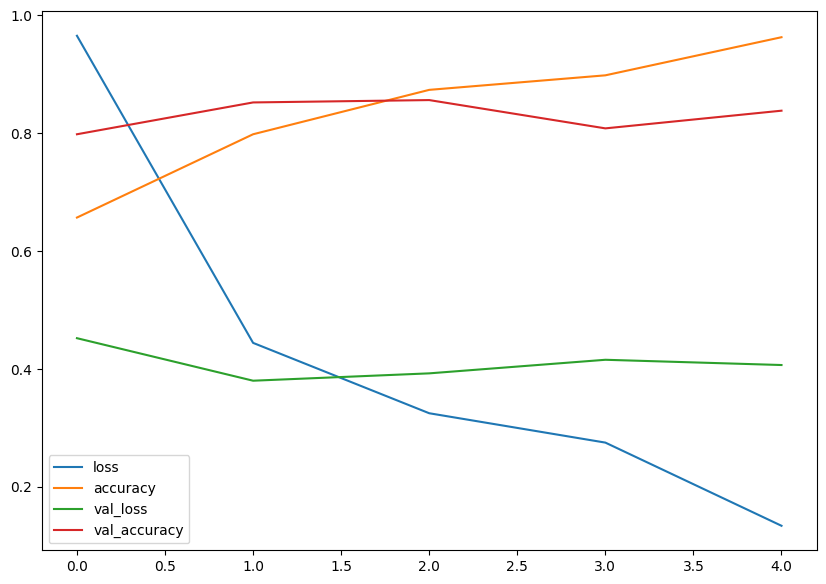

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [30]:
def plot_loss_curves(history):
  """
  Return separate curves for training and validation metrics.
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history["accuracy"]
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot the loss
  plt.figure()
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  # Plot rhe accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('accuracy')
  plt.xlabel('epochs')
  plt.legend()

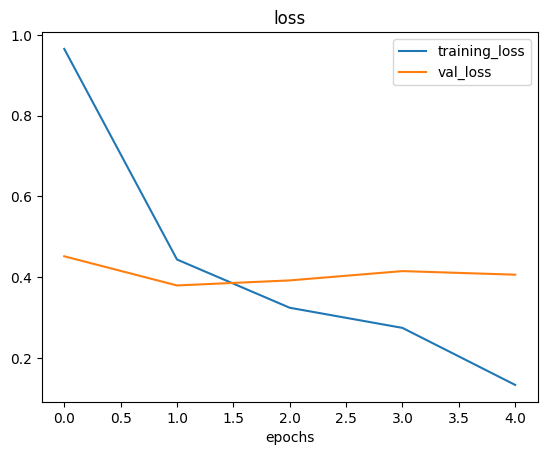

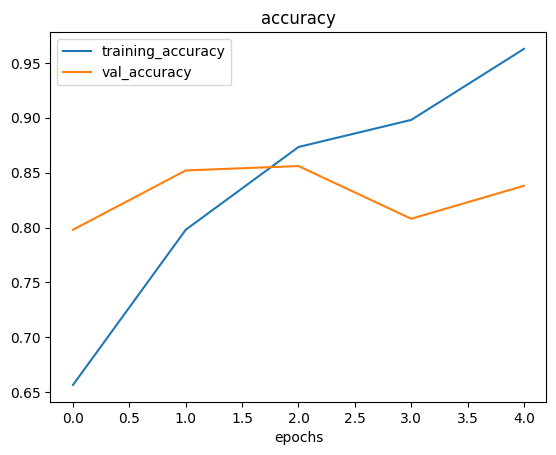

In [ ]:
plot_loss_curves(history_4)

### 6. Adjust the model parameters.

Fitting a machien learning model invvolves three steps

0. Create a baseline.
1. Beat the vaseline by overfiting a lorge model.
2. Reduce overfitting.

Was to indise overfitting

* increase the number of conv layers.
* increase the number of conv filters.
* add another dense layer to the output of the flattened layer.

Reduce overfitting:

* Add daa augmentation.
* add Regularization layer(such as muxPool@D).
* Add more data.

In [ ]:
# Create the new base line
model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [ ]:
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])


In [ ]:
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=(len(train_data)),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 7s 117ms/step - loss: 0.6171 - accuracy: 0.6853 - val_loss: 0.5907 - val_accuracy: 0.6800
Epoch 2/5
47/47 [==============================] - 6s 130ms/step - loss: 0.4726 - accuracy: 0.7873 - val_loss: 0.3911 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 5s 113ms/step - loss: 0.4123 - accuracy: 0.8193 - val_loss: 0.4013 - val_accuracy: 0.8160
Epoch 4/5
47/47 [==============================] - 8s 163ms/step - loss: 0.3950 - accuracy: 0.8307 - val_loss: 0.3400 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 6s 124ms/step - loss: 0.3637 - accuracy: 0.8393 - val_loss: 0.3250 - val_accuracy: 0.8640


In [ ]:
model_5.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 26, 26, 10)       

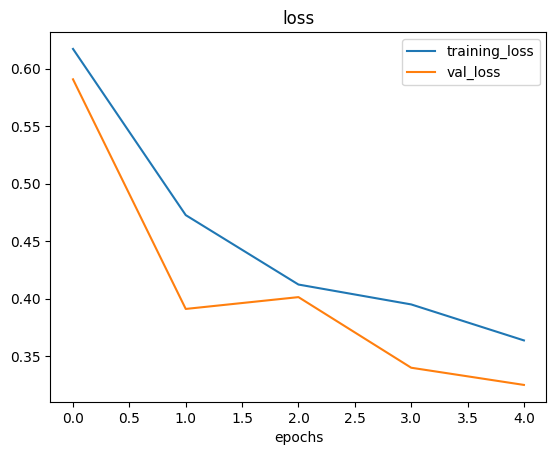

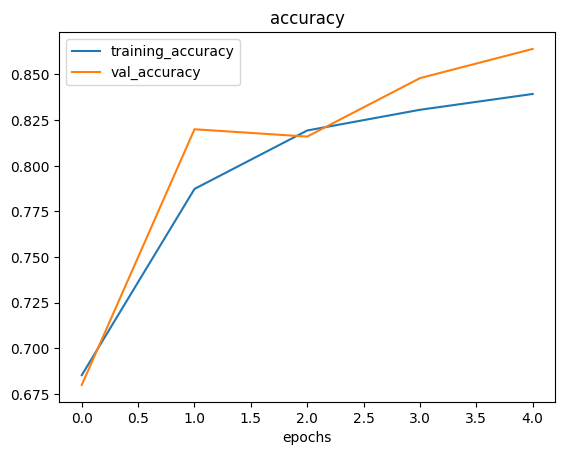

In [ ]:
plot_loss_curves(history_5)

### Data Augmentation

In [ ]:
# Create ImageDataGen with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                                rotation_range=0.1,
                                                shear_range=0.2,
                                                zoom_range=0.2,
                                                width_shift_range=0.2,
                                                height_shift_range=0.3,
                                                horizontal_flip=True)
# Create ImageDataGenerator without data augmentation.
train_datagen = ImageDataGenerator(rescale=1/225.)

# Create imageDataGe with no augmentation.
test_datagen = ImageDataGenerator(rescale=1/225.)


**What is Data Augmentation**

It si the process of altering the training data, leading it to have more diversity and in turn allowing our model to learn more generalizable patterns

In [ ]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                      target_size=(224, 224),
                                                                      batch_size=32,
                                                                      class_mode="binary",
                                                                      shuffle=False)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

IMG_SIZE = (224, 224)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode='binary'
                                             )

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


**NOTE** Data augmetation is usually only performed on the training data. Using "ImageDataGenerator" built-in data augmentation parameters or images are left as they are in the directories but are modified as they're loaded into the model.

In [ ]:
# Get samole augmentated data batches.
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() # labels are not augmented

showing image number: 15


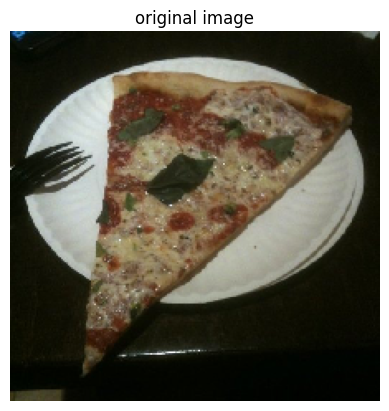

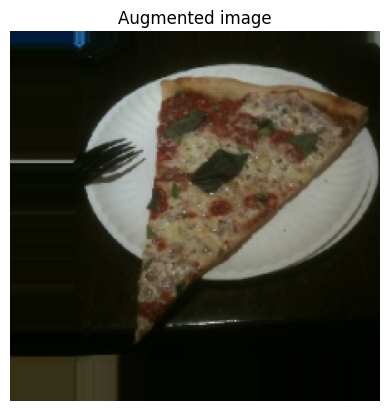

In [ ]:
# original images and augmented images.\
import random
random_number = random.randint(0, 32)
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [ ]:
# Model 6
model_6 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid'),
])

model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy'])

history_6 = model_6.fit(train_data_augmented,
            epochs=5,
            steps_per_epoch=len(train_data_augmented),
            validation_data = test_data,
            validation_steps=len(test_data)
            )


Epoch 1/5
47/47 [==============================] - 24s 477ms/step - loss: 0.7064 - accuracy: 0.3673 - val_loss: 0.6890 - val_accuracy: 0.5520
Epoch 2/5
47/47 [==============================] - 21s 451ms/step - loss: 0.6948 - accuracy: 0.5580 - val_loss: 0.6774 - val_accuracy: 0.5240
Epoch 3/5
47/47 [==============================] - 22s 471ms/step - loss: 0.7057 - accuracy: 0.5267 - val_loss: 0.6844 - val_accuracy: 0.7340
Epoch 4/5
47/47 [==============================] - 21s 443ms/step - loss: 0.6886 - accuracy: 0.5587 - val_loss: 0.6775 - val_accuracy: 0.5020
Epoch 5/5
47/47 [==============================] - 22s 473ms/step - loss: 0.6896 - accuracy: 0.5247 - val_loss: 0.6596 - val_accuracy: 0.6040


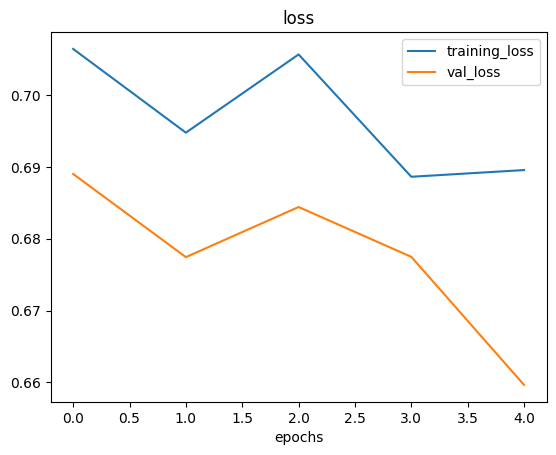

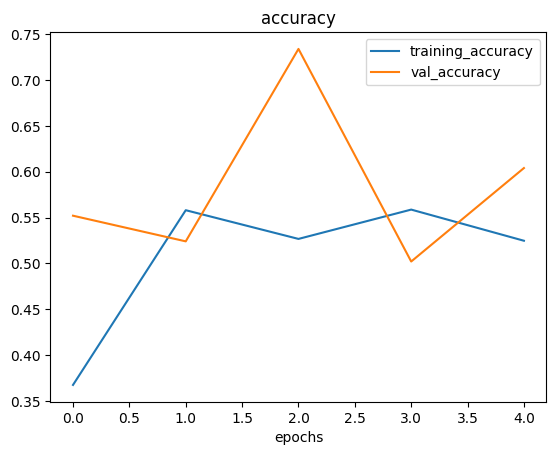

In [ ]:
plot_loss_curves(history_6)

In [ ]:
# Shuffle the training data.
train_data_augmented_shuffle = train_datagen_augmented.flow_from_directory(train_dir,
                                                                             target_size=(224, 224),
                                                                             batch_size=32,
                                                                             shuffle=True,
                                                                             class_mode='binary')

Found 1500 images belonging to 2 classes.


In [ ]:
# Create a model to see the performance on the augmented shuffed data
model_7 = Sequential([
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_7 = model_7.fit(train_data_augmented_shuffle,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffle),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
66/66 [==============================] - 24s 314ms/step - loss: 0.6715 - accuracy: 0.5827 - val_loss: 0.5722 - val_accuracy: 0.6880
Epoch 2/5
66/66 [==============================] - 21s 320ms/step - loss: 0.5676 - accuracy: 0.7027 - val_loss: 0.4343 - val_accuracy: 0.8100
Epoch 3/5
66/66 [==============================] - 23s 347ms/step - loss: 0.5204 - accuracy: 0.7413 - val_loss: 0.4364 - val_accuracy: 0.7900
Epoch 4/5
66/66 [==============================] - 20s 310ms/step - loss: 0.5153 - accuracy: 0.7453 - val_loss: 0.3707 - val_accuracy: 0.8520
Epoch 5/5
66/66 [==============================] - 22s 330ms/step - loss: 0.4854 - accuracy: 0.7640 - val_loss: 0.3321 - val_accuracy: 0.8480


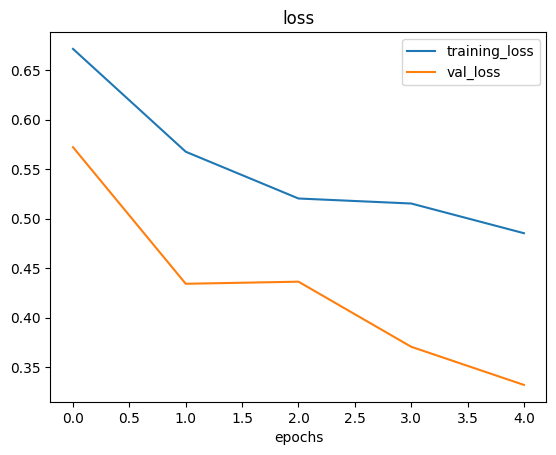

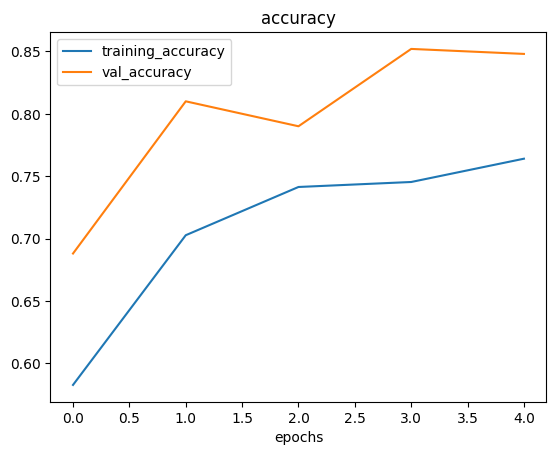

In [ ]:
plot_loss_curves(history_7)

### 7. repeat untill satisfied

* Incerease the number of model layers (e.g add more Conve2D / MaxPool2D layers)
* increase the number of filtters.
* Train for longer (more epochs)
* Find an ideal learning rate
* get more data
* use "" Transfer learning**

In [ ]:
model_8 = Sequential([
    Conv2D(30, 3, activation='relu', input_shape=(224, 224, 3)),
    Conv2D(30, 3, activation='relu'),
    MaxPool2D(pool_size=1),
    Conv2D(30, 3, activation='relu'),
    Conv2D(30, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_8.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=['accuracy']
                )

history_8 = model_8.fit(train_data_augmented_shuffle,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffle),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
66/66 [==============================] - 36s 424ms/step - loss: 0.6191 - accuracy: 0.6760 - val_loss: 0.3989 - val_accuracy: 0.8200
Epoch 2/5
66/66 [==============================] - 24s 361ms/step - loss: 0.5218 - accuracy: 0.7587 - val_loss: 0.3880 - val_accuracy: 0.8440
Epoch 3/5
66/66 [==============================] - 27s 403ms/step - loss: 0.5237 - accuracy: 0.7420 - val_loss: 0.4483 - val_accuracy: 0.8180
Epoch 4/5
66/66 [==============================] - 24s 365ms/step - loss: 0.5262 - accuracy: 0.7453 - val_loss: 0.4108 - val_accuracy: 0.8080
Epoch 5/5
66/66 [==============================] - 24s 368ms/step - loss: 0.5048 - accuracy: 0.7680 - val_loss: 0.5026 - val_accuracy: 0.7580


## Making prediction with the trained model

In [ ]:
print(class_names)

['pizza' 'steak']


(-0.5, 3023.5, 4031.5, -0.5)

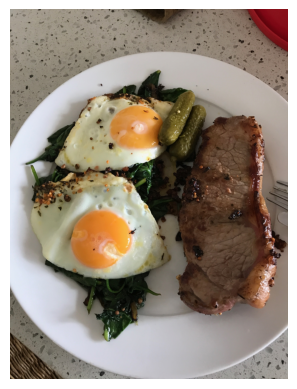

In [ ]:
# !wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False)

In [ ]:
steak.shape

(4032, 3024, 3)

In [ ]:
import tensorflow as tf
tf.expand_dims(steak, axis=0)

<tf.Tensor: shape=(1, 4032, 3024, 3), dtype=uint8, numpy=
array([[[[162, 158, 149],
         [163, 159, 150],
         [166, 162, 153],
         ...,
         [136,  17,  23],
         [140,  21,  27],
         [140,  21,  27]],

        [[164, 160, 151],
         [164, 160, 151],
         [164, 160, 151],
         ...,
         [133,  14,  20],
         [134,  15,  21],
         [137,  18,  24]],

        [[166, 162, 153],
         [165, 161, 152],
         [163, 159, 150],
         ...,
         [136,  17,  23],
         [134,  15,  21],
         [136,  17,  23]],

        ...,

        [[154, 132, 111],
         [142, 121, 100],
         [101,  80,  59],
         ...,
         [164, 155, 148],
         [152, 141, 135],
         [140, 129, 123]],

        [[141, 119,  96],
         [138, 118,  94],
         [106,  85,  64],
         ...,
         [158, 147, 141],
         [142, 131, 125],
         [138, 127, 121]],

        [[148, 126, 102],
         [148, 128, 103],
         [114,  

In [66]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads the image from the filename, turn it into a tensor and reshape
   it to (image_shape, image_shape , color_channels)
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # decode the read file into a tensor
  img = tf.image.decode_image(img)
  #Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape ])
  # rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
steak = load_and_prep_image('03-steak.jpeg')
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
 pred = model_7.predict(tf.expand_dims(steak, axis=0))
 pred

1/1 [==============================] - 0s 18ms/step


array([[0.92792726]], dtype=float32)

In [ ]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [67]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, make a prediction with model and
  plot the image with the predicted class as the title.
  """

  # import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # plot the image and the predicted class
  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False)

In [61]:
pred_and_plot(model_7, "03-steak.jpeg")

NameError: ignored

In [62]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
# pred_and_plot(model_7, "03-hamburger.jpeg")

--2024-01-03 07:14:21--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3564285 (3.4M) [image/jpeg]
Saving to: ‘03-hamburger.jpeg’

03-hamburger.jpeg   100%[===================>]   3.40M  --.-KB/s    in 0.07s   

2024-01-03 07:14:21 (49.4 MB/s) - ‘03-hamburger.jpeg’ saved [3564285/3564285]



## Multiclass image classificaion

# Multi-class Image Classification.

1. Become one with the data.
2. Preprocess the data.
3. Create a model start with the baseline
4. Fit the model
5. Evaluate the model.
6. Adjust different hyperparameters and improve the model's performance


In [2]:
# Become one with the data
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zip_ref.extractall()
zip_ref.close()

--2024-01-03 04:54:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.207, 142.250.1.207, 108.177.121.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   120MB/s    in 4.3s    

2024-01-03 04:54:45 (114 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [3]:
import os

for dirpath, dirnames, filenames in os.walk('10_food_classes_all_data'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")

There are 2 directories and 0 imafges in '10_food_classes_all_data'
There are 10 directories and 0 imafges in '10_food_classes_all_data/test'
There are 0 directories and 250 imafges in '10_food_classes_all_data/test/chicken_wings'
There are 0 directories and 250 imafges in '10_food_classes_all_data/test/pizza'
There are 0 directories and 250 imafges in '10_food_classes_all_data/test/sushi'
There are 0 directories and 250 imafges in '10_food_classes_all_data/test/chicken_curry'
There are 0 directories and 250 imafges in '10_food_classes_all_data/test/grilled_salmon'
There are 0 directories and 250 imafges in '10_food_classes_all_data/test/hamburger'
There are 0 directories and 250 imafges in '10_food_classes_all_data/test/fried_rice'
There are 0 directories and 250 imafges in '10_food_classes_all_data/test/ramen'
There are 0 directories and 250 imafges in '10_food_classes_all_data/test/ice_cream'
There are 0 directories and 250 imafges in '10_food_classes_all_data/test/steak'
There are 

In [9]:
# Set up the train and test directories
train_dir = '10_food_classes_all_data/train/'
test_dir = '10_food_classes_all_data/test/'

In [10]:
# Getthe class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['3708208.jpg']
Image shape: (512, 512, 3)


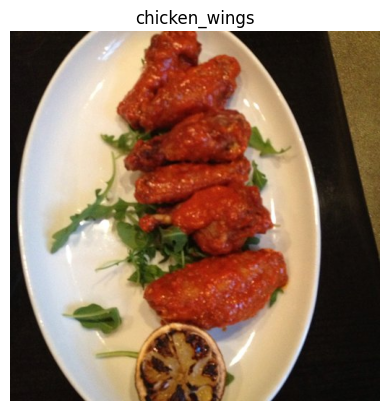

In [22]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

In [24]:
# Preproces the data.
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from the directory and turn them into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [26]:
# Create a mode by starting with the baseline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Intialize the model.
model_8 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation(activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation='softmax')
])

# Compile the model.
model_8.compile(loss="categorical_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics=['accuracy'])


In [32]:
# Fit the model.'
history_8 = model_8.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 30s 127ms/step - loss: 0.1173 - accuracy: 0.9691 - val_loss: 4.4778 - val_accuracy: 0.2996
Epoch 2/5
235/235 [==============================] - 30s 126ms/step - loss: 0.0544 - accuracy: 0.9865 - val_loss: 4.7536 - val_accuracy: 0.3104
Epoch 3/5
235/235 [==============================] - 30s 127ms/step - loss: 0.0281 - accuracy: 0.9932 - val_loss: 5.2810 - val_accuracy: 0.3196
Epoch 4/5
235/235 [==============================] - 33s 138ms/step - loss: 0.0359 - accuracy: 0.9909 - val_loss: 5.0067 - val_accuracy: 0.2848
Epoch 5/5
235/235 [==============================] - 30s 128ms/step - loss: 0.0254 - accuracy: 0.9928 - val_loss: 5.8646 - val_accuracy: 0.2960


In [33]:
# Model evaluation
model_8.evaluate(test_data)

79/79 [==============================] - 7s 91ms/step - loss: 5.8646 - accuracy: 0.2960


[5.864582538604736, 0.29600000381469727]

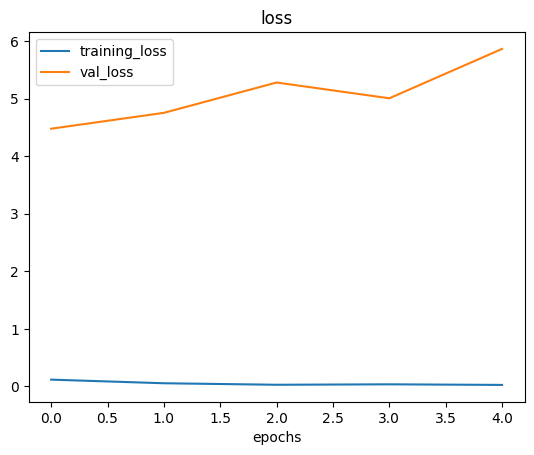

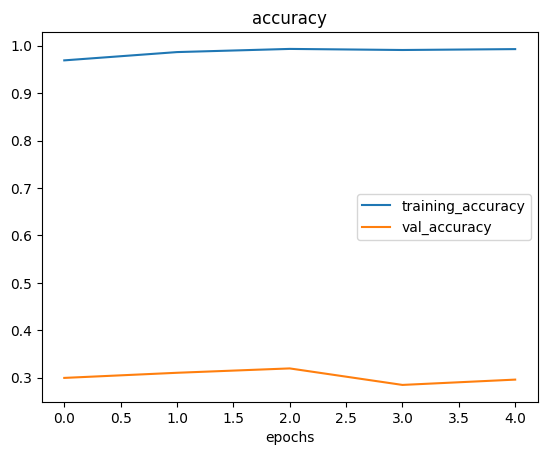

In [34]:
# Check out the models loss function
plot_loss_curves(history_8)

#### Adjust the model hyperparameters

In [36]:
## Simplify them model first
model_9 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
  Dense(10, activation='softmax')
])

model_9.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 30s 123ms/step - loss: 2.0320 - accuracy: 0.2752 - val_loss: 1.9297 - val_accuracy: 0.3272
Epoch 2/5
235/235 [==============================] - 32s 138ms/step - loss: 1.7300 - accuracy: 0.4091 - val_loss: 1.8569 - val_accuracy: 0.3532
Epoch 3/5
235/235 [==============================] - 29s 123ms/step - loss: 1.4434 - accuracy: 0.5253 - val_loss: 1.8883 - val_accuracy: 0.3568
Epoch 4/5
235/235 [==============================] - 29s 125ms/step - loss: 1.0467 - accuracy: 0.6625 - val_loss: 2.1753 - val_accuracy: 0.3180
Epoch 5/5
235/235 [==============================] - 28s 121ms/step - loss: 0.6504 - accuracy: 0.8031 - val_loss: 2.4537 - val_accuracy: 0.3240


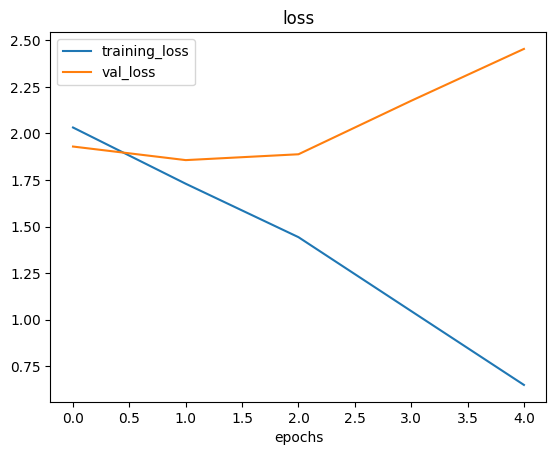

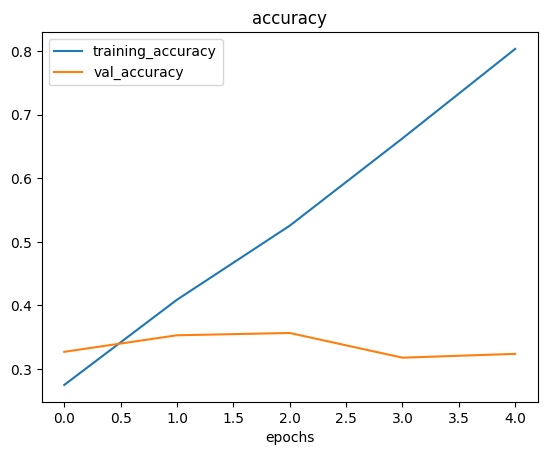

In [37]:
plot_loss_curves(history_9)

In [49]:
# improve the model using data augmentation.
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                          rotation_range=0.2,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [53]:
# fit the model on the augmented training dataset.
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model.
model_10.compile(loss='categorical_crossentropy',
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data_augmented,
             epochs=5,
             steps_per_epoch=len(train_data_augmented),
             validation_data = test_data,
             validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 114s 476ms/step - loss: 2.2657 - accuracy: 0.1412 - val_loss: 2.2009 - val_accuracy: 0.1936
Epoch 2/5
235/235 [==============================] - 111s 470ms/step - loss: 2.1948 - accuracy: 0.1883 - val_loss: 2.1357 - val_accuracy: 0.2272
Epoch 3/5
235/235 [==============================] - 112s 474ms/step - loss: 2.1359 - accuracy: 0.2291 - val_loss: 2.0533 - val_accuracy: 0.2572
Epoch 4/5
235/235 [==============================] - 123s 522ms/step - loss: 2.1195 - accuracy: 0.2429 - val_loss: 2.0357 - val_accuracy: 0.2712
Epoch 5/5
235/235 [==============================] - 122s 519ms/step - loss: 2.1000 - accuracy: 0.2529 - val_loss: 1.9984 - val_accuracy: 0.3056


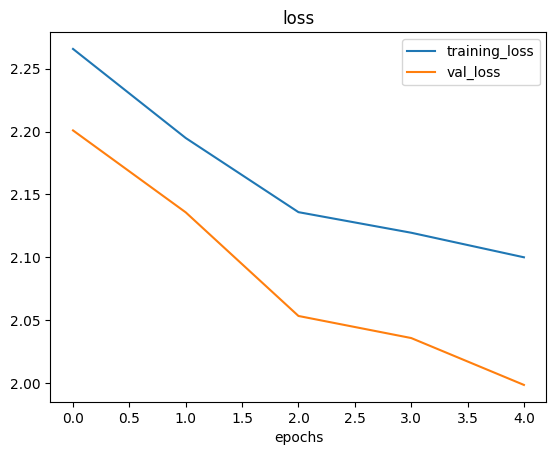

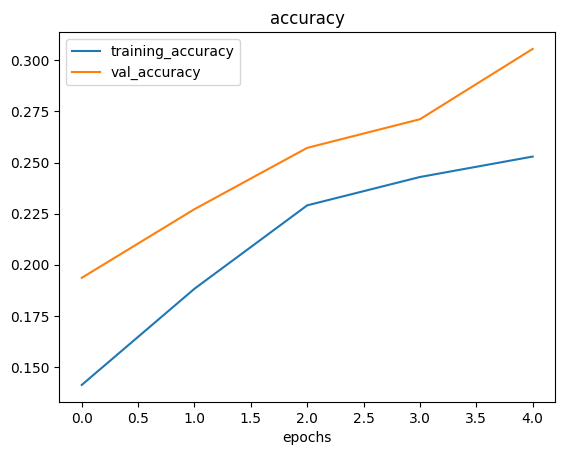

In [54]:
plot_loss_curves(history_10)

### Repeat until satisfied

- Restructure the models architecture
- adjust the learning rate
- try different methods of data augmentation
- try transfer learning.

### Make prediction with the trained model.


In [57]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [63]:
!wget https://raw_githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw_githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg


--2024-01-03 07:17:59--  https://raw_githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw_githubusercontent.com (raw_githubusercontent.com)... failed: Name or service not known.
wget: unable to resolve host address ‘raw_githubusercontent.com’
--2024-01-03 07:17:59--  https://raw_githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
Resolving raw_githubusercontent.com (raw_githubusercontent.com)... failed: Name or service not known.
wget: unable to resolve host address ‘raw_githubusercontent.com’
--2024-01-03 07:17:59--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg

In [71]:
# make prediction
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, make a prediction with model and
  plot the image with the predicted class as the title.
  """

  # import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0]) > 1:
    pred_class =class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]


  # plot the image and the predicted class
  plt.imshow(img)
  plt.title(f'Prediction: {pred_class}')
  plt.axis(False)


1/1 [==============================] - 0s 28ms/step


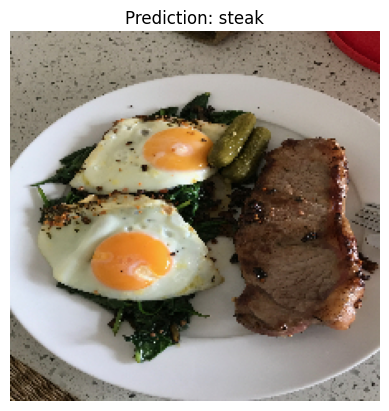

In [74]:
pred_and_plot(model_10, "03-steak.jpeg", class_names=list(class_names))

In [75]:
# save model
model_10.save("saved_trained_model_10")

In [76]:
# Load in a trained model and evaluate it
loaded_model_10 = tf.keras.models.load_model('saved_trained_model_10')
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 8s 92ms/step - loss: 1.9984 - accuracy: 0.3056


[1.9984312057495117, 0.30559998750686646]

In [77]:
loaded_model_10.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 activation_1 (Activation)   (None, 222, 222, 10)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 110, 110, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 106, 106, 10)      910       
                                                      